In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Загрузка и осмотр датасета

In [228]:
df = pd.read_csv('Global YouTube Statistics.csv', encoding='ISO-8859-1')


Описание датасета:  
- rank: Position of the YouTube channel based on the number of subscribers  
- Youtuber: Name of the YouTube channel  
- subscribers: Number of subscribers to the channel  
- video views: Total views across all videos on the channel  
- category: Category or niche of the channel  
- Title: Title of the YouTube channel  
- uploads: Total number of videos uploaded on the channel  
- Country: Country where the YouTube channel originates  
- Abbreviation: Abbreviation of the country  
- channel_type: Type of the YouTube channel (e.g., individual, brand)  
- video_views_rank: Ranking of the channel based on total video views  
- country_rank: Ranking of the channel based on the number of subscribers within its country  
- channel_type_rank: Ranking of the channel based on its type (individual or brand)  
- video_views_for_the_last_30_days: Total video views in the last 30 days  
- lowest_monthly_earnings: Lowest estimated monthly earnings from the channel  
- highest_monthly_earnings: Highest estimated monthly earnings from the channel  
- lowest_yearly_earnings: Lowest estimated yearly earnings from the channel  
- highest_yearly_earnings: Highest estimated yearly earnings from the channel  
- subscribers_for_last_30_days: Number of new subscribers gained in the last 30 days  
- created_year: Year when the YouTube channel was created  
- created_month: Month when the YouTube channel was created  
- created_date: Exact date of the YouTube channel's creation  
- Gross tertiary education enrollment (%): Percentage of the population enrolled in tertiary education in the country  
- Population: Total population of the country  
- Unemployment rate: Unemployment rate in the country  
- Urban_population: Percentage of the population living in urban areas  
- Latitude: Latitude coordinate of the country's location  
- Longitude: Longitude coordinate of the country's location  

In [229]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [230]:
df.describe(include='all')

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
count,995.00000,995,9.950000e+02,9.950000e+02,949,995,995.000000,873,873,965,...,6.580000e+02,990.000000,990,990.000000,872.000000,8.720000e+02,872.000000,8.720000e+02,872.000000,872.000000
unique,NaN,995,NaN,NaN,18,992,NaN,49,49,14,...,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,T-Series,NaN,NaN,Entertainment,Preston,NaN,United States,US,Entertainment,...,NaN,NaN,Jan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,241,2,NaN,313,313,304,...,NaN,NaN,101,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,498.00000,NaN,2.298241e+07,1.103954e+10,NaN,NaN,9187.125628,NaN,NaN,NaN,...,3.490791e+05,2012.630303,NaN,15.746465,63.627752,4.303873e+08,9.279278,2.242150e+08,26.632783,-14.128146
std,287.37606,NaN,1.752611e+07,1.411084e+10,NaN,NaN,34151.352254,NaN,NaN,NaN,...,6.143554e+05,4.512503,NaN,8.777520,26.106893,4.727947e+08,4.888354,1.546874e+08,20.560533,84.760809
min,1.00000,NaN,1.230000e+07,0.000000e+00,NaN,NaN,0.000000,NaN,NaN,NaN,...,1.000000e+00,1970.000000,NaN,1.000000,7.600000,2.025060e+05,0.750000,3.558800e+04,-38.416097,-172.104629
25%,249.50000,NaN,1.450000e+07,4.288145e+09,NaN,NaN,194.500000,NaN,NaN,NaN,...,1.000000e+05,2009.000000,NaN,8.000000,36.300000,8.335541e+07,5.270000,5.590832e+07,20.593684,-95.712891
50%,498.00000,NaN,1.770000e+07,7.760820e+09,NaN,NaN,729.000000,NaN,NaN,NaN,...,2.000000e+05,2013.000000,NaN,16.000000,68.000000,3.282395e+08,9.365000,2.706630e+08,37.090240,-51.925280
75%,746.50000,NaN,2.460000e+07,1.355470e+10,NaN,NaN,2667.500000,NaN,NaN,NaN,...,4.000000e+05,2016.000000,NaN,23.000000,88.200000,3.282395e+08,14.700000,2.706630e+08,37.090240,78.962880


визуализация пропущенных данных

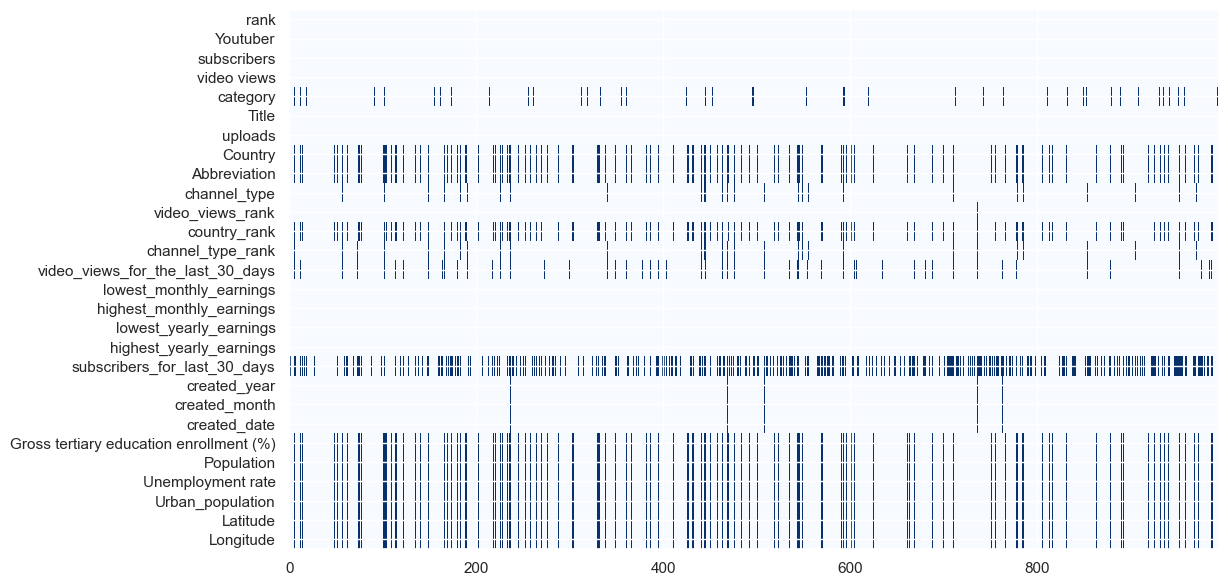

In [231]:

plt.figure(figsize=(12, 7))
plt.imshow(df.isna().T, cmap="Blues", interpolation='nearest', aspect='auto')
plt.yticks(np.arange(len(df.columns)), labels=df.columns.to_list())
plt.show()

удалим нескколько строк в которых данные полностью отсутствуют, а так же некоторые неактуальные колонки

In [232]:
df.drop(df[df['created_year'].isna()].index, inplace=True)
df.drop(columns=['Abbreviation', 'created_date', 'Latitude', 'Longitude'])

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,channel_type,video_views_rank,...,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,Music,1.0,...,9000000.00,6800000.00,1.084000e+08,2000000.0,2006.0,Mar,28.1,1.366418e+09,5.36,471031528.0
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,Games,4055159.0,...,0.05,0.04,5.800000e-01,NaN,2006.0,Mar,88.2,3.282395e+08,14.70,270663028.0
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,Entertainment,48.0,...,5400000.00,4000000.00,6.470000e+07,8000000.0,2012.0,Feb,88.2,3.282395e+08,14.70,270663028.0
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,Education,2.0,...,7900000.00,5900000.00,9.480000e+07,1000000.0,2006.0,Sep,88.2,3.282395e+08,14.70,270663028.0
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,Entertainment,3.0,...,7300000.00,5500000.00,8.750000e+07,1000000.0,2006.0,Sep,28.1,1.366418e+09,5.36,471031528.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,Entertainment,525.0,...,2200000.00,1700000.00,2.650000e+07,700000.0,2017.0,Feb,51.3,2.125594e+08,12.08,183241641.0
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,Games,6141.0,...,258900.00,194200.00,3.100000e+06,300000.0,2018.0,Sep,28.1,1.366418e+09,5.36,471031528.0
992,993,Panda,12300000,2.214684e+09,NaN,HybridPanda,2452,United Kingdom,Games,129005.0,...,268.00,201.00,3.200000e+03,1000.0,2006.0,Sep,60.0,6.683440e+07,3.85,55908316.0
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,Games,35112.0,...,15500.00,11600.00,1.858000e+05,100000.0,2012.0,May,67.0,1.028545e+07,6.48,9021165.0


посмотрим на данные, выборочно

In [233]:
df_ppcols = df[[
    'subscribers', 'video views', 'uploads', 'video_views_rank',
    'lowest_yearly_earnings', 'highest_yearly_earnings',
    'Gross tertiary education enrollment (%)', 'Population',
    'Unemployment rate', 'Urban_population'
]]
df_ppcols

,subscribers,video views,uploads,video_views_rank,lowest_yearly_earnings,highest_yearly_earnings,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population
0,245000000,2.280000e+11,20082,1.0,6800000.00,1.084000e+08,28.1,1.366418e+09,5.36,471031528.0
1,170000000,0.000000e+00,1,4055159.0,0.04,5.800000e-01,88.2,3.282395e+08,14.70,270663028.0
2,166000000,2.836884e+10,741,48.0,4000000.00,6.470000e+07,88.2,3.282395e+08,14.70,270663028.0
3,162000000,1.640000e+11,966,2.0,5900000.00,9.480000e+07,88.2,3.282395e+08,14.70,270663028.0
4,159000000,1.480000e+11,116536,3.0,5500000.00,8.750000e+07,28.1,1.366418e+09,5.36,471031528.0
...,...,...,...,...,...,...,...,...,...,...
990,12300000,9.029610e+09,1200,525.0,1700000.00,2.650000e+07,51.3,2.125594e+08,12.08,183241641.0
991,12300000,1.674410e+09,1500,6141.0,194200.00,3.100000e+06,28.1,1.366418e+09,5.36,471031528.0
992,12300000,2.214684e+09,2452,129005.0,201.00,3.200000e+03,60.0,6.683440e+07,3.85,55908316.0
993,12300000,3.741235e+08,39,35112.0,11600.00,1.858000e+05,67.0,1.028545e+07,6.48,9021165.0


построим матрицу кореляций по количественным данным

In [234]:
df_corr = df_ppcols.select_dtypes(include='number').corr(method='spearman')
df_corr

,subscribers,video views,uploads,video_views_rank,lowest_yearly_earnings,highest_yearly_earnings,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population
subscribers,1.000000,0.554585,0.026386,-0.383926,0.246598,0.246880,0.036634,0.042986,0.031340,0.043773
video views,0.554585,1.000000,0.211329,-0.748184,0.508005,0.508952,0.045643,0.038339,0.064544,0.037016
uploads,0.026386,0.211329,1.000000,-0.520210,0.456449,0.455945,-0.214550,0.088510,-0.153149,0.072581
video_views_rank,-0.383926,-0.748184,-0.520210,1.000000,-0.781566,-0.781305,-0.027200,-0.085356,-0.071534,-0.084765
lowest_yearly_earnings,0.246598,0.508005,0.456449,-0.781566,1.000000,0.999876,-0.086573,0.136784,-0.005839,0.137087
highest_yearly_earnings,0.246880,0.508952,0.455945,-0.781305,0.999876,1.000000,-0.086778,0.136515,-0.006150,0.136779
Gross tertiary education enrollment (%),0.036634,0.045643,-0.214550,-0.027200,-0.086573,-0.086778,1.000000,-0.280368,0.606425,-0.252090
Population,0.042986,0.038339,0.088510,-0.085356,0.136784,0.136515,-0.280368,1.000000,0.311210,0.993142
Unemployment rate,0.031340,0.064544,-0.153149,-0.071534,-0.005839,-0.006150,0.606425,0.311210,1.000000,0.334951
Urban_population,0.043773,0.037016,0.072581,-0.084765,0.137087,0.136779,-0.252090,0.993142,0.334951,1.000000


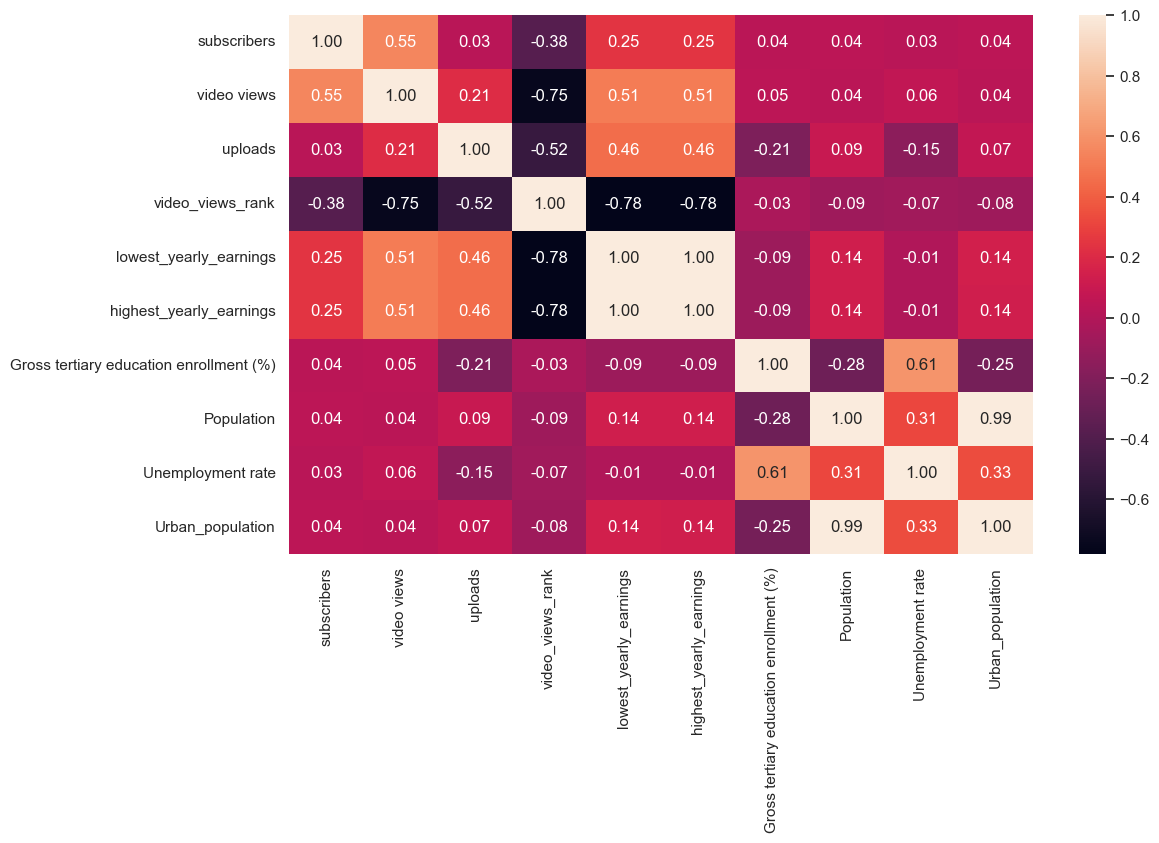

In [235]:
plt.figure(figsize=(12,7))
sns.heatmap(df_corr, annot=True, fmt='.2f')
plt.show()

#### 1. Зависимость просмотров от подписчиков  
> Положительная кореляция

<Figure size 1000x500 with 0 Axes>

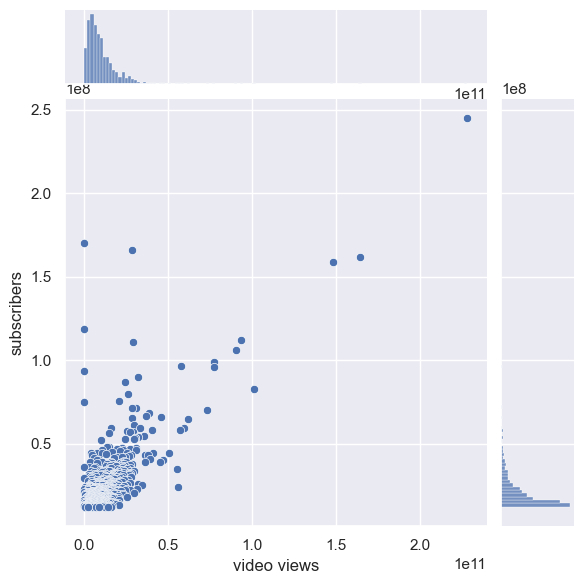

In [236]:
plt.figure(figsize=(10,5))
sns.jointplot(x=df['video views'], y=df['subscribers'])
plt.show()

#### 2. Распределение каналов по странам

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
Country,United States,India,Brazil,United Kingdom,Mexico,Indonesia,Spain,Thailand,South Korea,Russia,...,Malaysia,Latvia,Andorra,Finland,El Salvador,Cuba,China,Barbados,Bangladesh,Kuwait
Youtuber,312,168,61,43,33,28,22,18,17,16,...,1,1,1,1,1,1,1,1,1,1


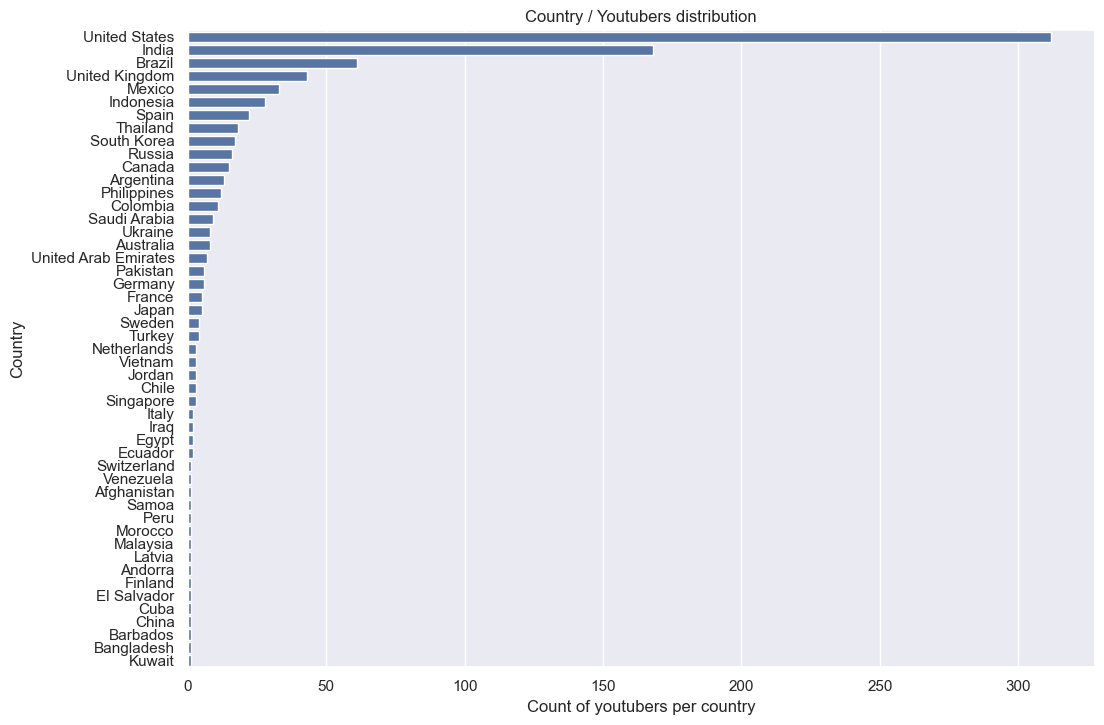

In [237]:
c_yt = df[['Country', 'Youtuber']].groupby('Country').count().sort_values(
    'Youtuber', ascending=False).reset_index()
display(c_yt.T)
sns.set(rc={'figure.figsize': (11.7, 8.27)})
sns.barplot(c_yt, y='Country',
            x='Youtuber').set(xlabel="Count of youtubers per country",
                              ylabel="Country",
                              title='Country / Youtubers distribution')
plt.show()


#### 3. Чем больше загрузок тем больше заработок?  
> Похоже, что нет. Кореляция 0.46

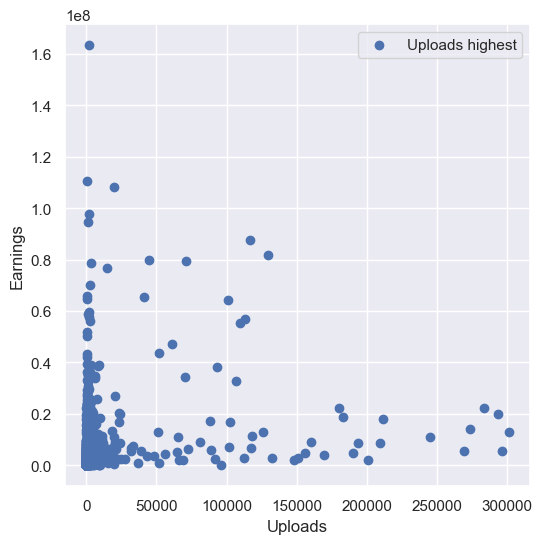

In [238]:
from matplotlib.pyplot import xlabel

u_hle = df[['uploads', 'highest_yearly_earnings']]

plt.figure(figsize=(6,6))
plt.scatter(x=u_hle['uploads'], y=u_hle['highest_yearly_earnings'], label='Uploads highest')
plt.xlabel('Uploads')
plt.ylabel('Earnings')
plt.legend()
plt.show()

Классиффикация